# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [123]:
#ваш код 

import pandas as pd
df = pd.read_csv('../../data/Advertising.csv',index_col=0)
display(df.head())
df.shape

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


(200, 4)

> Вывод

> Данные успешно подгрузились
>   * Имеются 200 строк и 4 столбца

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [124]:
#ваш код 

df_nan = df.isnull().sum()
display(df_nan)

if df_nan.values.sum()>0 : df=df.dropna() 

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [125]:
#ваш код 

display(df.info())

# Поиск копий
df_int=df.shape[0]                               # Количество строк 
df_int=df_int-df.drop_duplicates().shape[0]      # Количество копий
print('Количество копий:',df_int)


<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


None

Количество копий: 0


> Вывод

> Данные все числовые, пропусков и копий нет

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [126]:
#ваш код 
import numpy as np
X = np.array(df) # Преобразуем признаки в массивы NumPy

# разделение на переменные X (предикторы) и y(целевая переменная)
y = X[0:,3]
X = X[0:,:3]

> Вывод

> Зачем признаки преобразывали в массивы NumPy если в дальнейшен они преобразовывоются в массивы NumPy?

>Разделили выборку на целевую и предикт переменные

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [127]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [128]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [129]:
# ваш код 

num_iters = 1000 #количество итераций
m = X.shape[0]# количество строк в матрице X
n = X.shape[1]# количество столбцов в матрице X
w = np.zeros((n,1))#вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum(((X @ w) - y) ** 2)/(len(y))
        
print('Веса для модели линейной регрессии:',w.T)


Веса для модели линейной регрессии: [[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [130]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

>Вывод

>Они не практически совпали, а полностью совпали.

>Спасибо за подсказку с кодом.

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [131]:
#ваш код

# разделение на переменные X (предикторы) и y(целевая переменная), y сразу в NumPy
X = df.drop('sales',axis=1)
y = np.array(df['sales'])
# масштабируем (X-X_среднее)/X_стандартное отклонение
X_cent = X - X.mean(axis=0)
X = X_cent/X.std()

**Добавим единичный столбец**

In [132]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [133]:
#ваш код

def mse_error (y_ped, y_cel):
    return (sum((y_ped-y_cel)**2))/len(y_cel)

>$$𝑀𝑆𝐸 = \frac{\sum_{i=1}^{n} (y_{i}- \vec{ y_{i}})^2}{n}$$

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [134]:
#ваш код

y_mean=y.mean()
y_predict=np.zeros(y.shape[0])+y_mean
    
print('Cреднеквадратичная ошибка: {:.3f}'.format(mse_error(y_predict, y)))

Cреднеквадратичная ошибка: 27.086


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [135]:
#ваш код

lin_pred = lambda X_p, w_hat: X_p @ w_hat

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [136]:
#ваш код

def stoch_grad_step(X, y, w, train_ind, eta):
    # умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке
    dx = (2 * X[train_ind] * (lin_pred(X[train_ind], w) - y[train_ind]))/X.shape[0]
    # вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска
    return w - dx * eta

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [137]:
# ваш код

def stochastic_gradient_descent(X, y, w, temp, i, Evklid):
    lengt_w = 99999999 # расстояние между векторами весов
    err = [] # список для фиксации ошибок
    n = 0    # счетчик итераций
    # цикл обучения пока расстояние между векторами весов больше того,
    # при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) 
    # и количество итераций меньше максимально разрешенного:
    while lengt_w > 0.001 and n < i:
        index = np.random.randint(1,X.shape[0]) # случайный индекс
        w = stoch_grad_step(X, y, w, index, temp)
        lengt_w = np.linalg.norm(w)
        err.append(mse_error(lin_pred(X, w),y))
        n += 1
        
    return w, np.array(err)

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

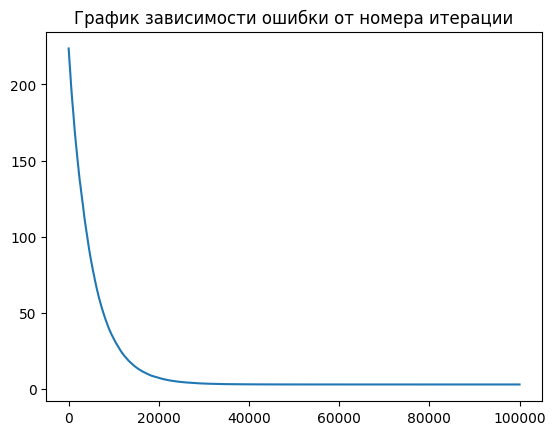

In [138]:
# ваш код
import matplotlib.pyplot as plt

iter = 100000
w = np.zeros(X.shape[1])
temp = 0.01
w, m_err = stochastic_gradient_descent(X, y, w, temp, iter, 0.001)

plt.plot(pd.DataFrame(m_err))
plt.title('График зависимости ошибки от номера итерации')

# function to show the plot
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [139]:
# ваш код

# Вывод значений весов МНК на экран
print('w0: {:.0f}'.format(w[0])) #свободный член w0
for index, i in enumerate( w[1:]):
    print('w{}: {:.3f}   -{}'.format(index+1,i,df.columns[index]))

w0: 14
w1: 3.916   -TV
w2: 2.820   -radio
w3: -0.045   -newspaper


**Выведите среднеквадратичную ошибку на последней итерации.**

In [140]:
# ваш код

print('Cреднеквадратичная ошибка = {:.3f}'.format(m_err[-1]))

Cреднеквадратичная ошибка = 2.785
